In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_columns = ['Date/Time',
              'BLOCCO1:ZONA1:Zone Operative Temperature [C](TimeStep:ON)',
              'BLOCCO1:ZONA1:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep)',
              'BLOCCO1:ZONA2:Zone Operative Temperature [C](TimeStep:ON)',
              'BLOCCO1:ZONA2:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep)', 
              'BLOCCO1:ZONA3:Zone Operative Temperature [C](TimeStep:ON)',
              'BLOCCO1:ZONA3:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep)', 
              'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
              'Environment:Site Outdoor Air Barometric Pressure [Pa](TimeStep)',
              'Environment:Site Wind Speed [m/s](TimeStep)',
              'Environment:Site Wind Direction [deg](TimeStep)',
              'DistrictHeating:Facility [J](TimeStep)',
              'DistrictCooling:Facility [J](TimeStep)']

#csv_columns = ['Date/Time',
#              'BLOCK1:ZONE1:Zone Mean Air Temperature [C](TimeStep:ON)',
#              'BLOCK1:ZONE1:Zone Air Relative Humidity [%](TimeStep:ON)',
#              'BLOCK1:ZONE1:Zone Ventilation Air Change Rate [ach](TimeStep)',
#              'BLOCK1:ZONE1:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep)',
#              'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
#              'Environment:Site Outdoor Air Barometric Pressure [Pa](TimeStep)',
#              'Environment:Site Wind Speed [m/s](TimeStep)',
#              'Environment:Site Wind Direction [deg](TimeStep)',
#              'DistrictHeating:Facility [J](TimeStep)',
#              'DistrictCooling:Facility [J](TimeStep)']



In [3]:
idf_data = pd.read_csv('/home/ict4bd/Residential_oslo/outputDir2016/eplusout.csv',usecols=csv_columns)

In [4]:
df_columns = {'Date/Time':'Date_Time',
              'BLOCCO1:ZONA1:Zone Operative Temperature [C](TimeStep:ON)':'t_in_bathroom',
              'BLOCCO1:ZONA1:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep)':'solar_rad_bathroom', 
              'BLOCCO1:ZONA2:Zone Operative Temperature [C](TimeStep:ON)':'t_in_bedroom',
              'BLOCCO1:ZONA2:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep)':'solar_rad_bedroom',
              'BLOCCO1:ZONA3:Zone Operative Temperature [C](TimeStep:ON)':'t_in_diningroom',
              'BLOCCO1:ZONA3:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep)':'solar_rad_diningroom',
              'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)':'t_out',
              'Environment:Site Outdoor Air Barometric Pressure [Pa](TimeStep)':'pressure',
              'Environment:Site Wind Speed [m/s](TimeStep)':'wind_speed',
              'Environment:Site Wind Direction [deg](TimeStep)':'wind_dir',
              'DistrictHeating:Facility [J](TimeStep)':'power_heating',
              'DistrictCooling:Facility [J](TimeStep)':'power_cooling'}


#df_columns = {'Date/Time':'Date_Time',
#              'BLOCK1:ZONE1:Zone Mean Air Temperature [C](TimeStep:ON)':'t_in',
#              'BLOCK1:ZONE1:Zone Air Relative Humidity [%](TimeStep:ON)':'humidity',
#              'BLOCK1:ZONE1:Zone Ventilation Air Change Rate [ach](TimeStep)':'ACH',
#              'BLOCK1:ZONE1:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep)':'solar_rad',           
#              'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)':'t_out',
#              'Environment:Site Outdoor Air Barometric Pressure [Pa](TimeStep)':'pressure',
#              'Environment:Site Wind Speed [m/s](TimeStep)':'wind_speed',
#              'Environment:Site Wind Direction [deg](TimeStep)':'wind_dir',
#              'DistrictHeating:Facility [J](TimeStep)':'power_heating',
#              'DistrictCooling:Facility [J](TimeStep)':'power_cooling'}


In [5]:
idf_data = idf_data.rename(columns = df_columns)

In [6]:
area_1 = 4.3647
area_2 = 14.665
area_3 = 22.7323
area_tot = area_1 + area_2 + area_3

In [7]:
idf_data['t_in'] = idf_data['t_in_bathroom']*area_1/area_tot + idf_data['t_in_bedroom']*area_2/area_tot + idf_data['t_in_diningroom']*area_3/area_tot
idf_data.drop(['t_in_bathroom','t_in_bedroom','t_in_diningroom'], axis = 1)

idf_data['solar_rad'] = idf_data['solar_rad_bathroom'] + idf_data['solar_rad_bedroom'] + idf_data['solar_rad_diningroom']
idf_data.drop(['solar_rad_bathroom','solar_rad_bedroom','solar_rad_diningroom'], axis = 1)



,Date_Time,t_out,pressure,wind_speed,wind_dir,solar_rad_diningroom,solar_rad_bathroom,solar_rad_bedroom,t_in_diningroom,t_in_bathroom,t_in_bedroom,power_cooling,power_heating,t_in,solar_rad
0,01/01 00:15:00,0.009259,100225.0,0.838176,0.838176,0.0,0.0,0.0,19.996229,19.612810,19.129547,0.0,7.463040e+05,19.651816,0.0
1,01/01 00:30:00,0.453704,100350.0,0.931307,0.931307,0.0,0.0,0.0,19.969882,19.600158,19.120314,0.0,7.485241e+05,19.632909,0.0
2,01/01 00:45:00,0.898148,100475.0,1.024437,1.024437,0.0,0.0,0.0,19.944534,19.587559,19.111180,0.0,7.501056e+05,19.614588,0.0
3,01/01 01:00:00,1.342593,100600.0,1.117568,1.117568,0.0,0.0,0.0,19.920317,19.575319,19.102577,0.0,7.508624e+05,19.597105,0.0
4,01/01 01:15:00,1.375000,100575.0,1.173447,1.173447,0.0,0.0,0.0,19.899262,19.565044,19.097438,0.0,7.603039e+05,19.582766,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,12/31 23:00:00,0.777778,100800.0,0.223514,0.223514,0.0,0.0,0.0,19.215379,19.220067,18.801411,0.0,1.001486e+06,19.070502,0.0
35036,12/31 23:15:00,0.777778,100775.0,0.242140,0.242140,0.0,0.0,0.0,19.196410,19.214789,18.795920,0.0,1.176815e+06,19.057696,0.0
35037,12/31 23:30:00,0.777778,100750.0,0.260766,0.260766,0.0,0.0,0.0,19.186870,19.210745,18.793393,0.0,1.184606e+06,19.051193,0.0
35038,12/31 23:45:00,0.777778,100725.0,0.279392,0.279392,0.0,0.0,0.0,19.178948,19.206756,18.791323,0.0,1.190360e+06,19.045737,0.0


In [8]:
#idf_data['temp_diff'] =idf_data['t_in'] - idf_data['t_out']

In [9]:
idf_data['Date_Time'] = '2016/' + idf_data['Date_Time'].str.strip()
idf_data['Date_Time'] = idf_data['Date_Time'].str.replace('24:00:00','00:00:00')

In [10]:
idf_data['power_heating'] /= 3.6e6 
idf_data['power_cooling'] /= 3.6e6

In [11]:
idf_data['power_heating'] = idf_data['power_heating'].apply(lambda x: round(x, 2))
idf_data['power_cooling'] = idf_data['power_cooling'].apply(lambda x: round(x, 2))
idf_data['t_in'] = idf_data['t_in'].apply(lambda x: round(x, 2))
idf_data['t_out'] = idf_data['t_out'].apply(lambda x: round(x, 2))
idf_data['solar_rad'] = idf_data['solar_rad'].apply(lambda x: round(x, 2))


In [12]:
area_1 = 4.3647
area_2 = 14.665
area_3 = 22.7323
area_tot = area_1 + area_2 + area_3

In [13]:
#idf_data['total_plants'] = idf_data['power_heating']+ idf_data['power_cooling']
#idf_data['power_h1'] = idf_data['power_heating']*area_1/area_tot
#idf_data['power_h2'] = idf_data['power_heating']*area_2/area_tot
#idf_data['power_h3'] = idf_data['power_heating']*area_3/area_tot
#idf_data['power_c1'] = idf_data['power_cooling']*area_1/area_tot
#idf_data['power_c2'] = idf_data['power_cooling']*area_2/area_tot
#idf_data['power_c3'] = idf_data['power_cooling']*area_3/area_tot

In [14]:
idf_data = idf_data[['Date_Time','t_in','t_out','power_heating','power_cooling','solar_rad']]

In [15]:
idf_data.to_csv(path_or_buf='/home/ict4bd/Residential_oslo/2016_total.csv',index=False)

In [16]:
idf_data

,Date_Time,t_in,t_out,power_heating,power_cooling,solar_rad
0,2019/01/01 00:15:00,19.65,0.01,0.83,0.0,0.0
1,2019/01/01 00:30:00,19.63,0.45,0.83,0.0,0.0
2,2019/01/01 00:45:00,19.61,0.90,0.83,0.0,0.0
3,2019/01/01 01:00:00,19.60,1.34,0.83,0.0,0.0
4,2019/01/01 01:15:00,19.58,1.37,0.84,0.0,0.0
...,...,...,...,...,...,...
35035,2019/12/31 23:00:00,19.07,0.78,1.11,0.0,0.0
35036,2019/12/31 23:15:00,19.06,0.78,1.31,0.0,0.0
35037,2019/12/31 23:30:00,19.05,0.78,1.32,0.0,0.0
35038,2019/12/31 23:45:00,19.05,0.78,1.32,0.0,0.0


In [17]:
idf_data_hour = pd.read_csv('/home/ict4bd/Residential1/2016_total.csv', parse_dates=[0,], index_col='Date_Time')
idf_data_hour = idf_data_hour.resample('H').interpolate()
idf_data_hour.to_csv(path_or_buf='/home/ict4bd/Residential1/2016_total.csv')

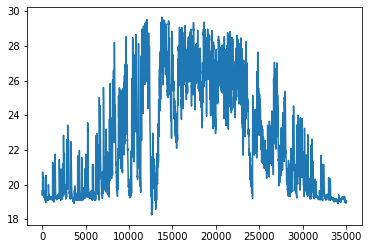

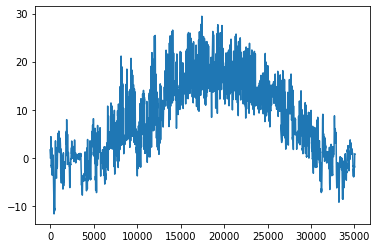

In [18]:
#idf_data_hour = idf_data_hour.resample('D').interpolate()
plt.plot(idf_data['t_in'])
plt.show()
plt.plot(idf_data['t_out'])
plt.show()